a0 =  2.8659e-08 pc
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1593s
Evolving from  143.7359943805649  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1630s
Evolving from  187.9624541899695  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1711s
Evolving from  232.18891399937408  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1780s
Evolving from  276.41537380877867  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, },

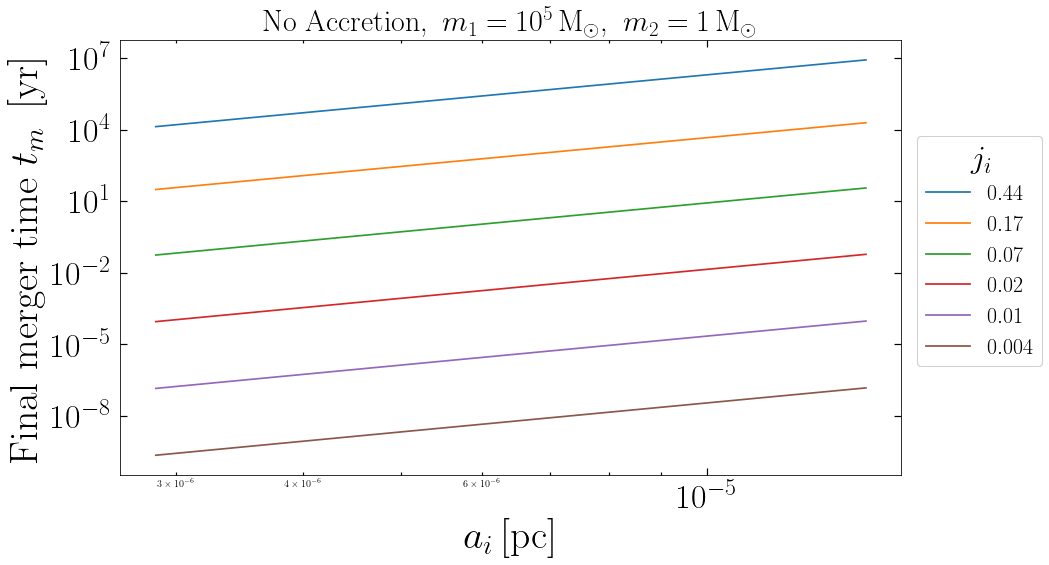

In [12]:
# Final merger time for the reference systems with masses m_1 = 1e5 M_solar
# and m_2 = 1 M_solar, as a function of the initial 
# angular momentum j0 for binaries having Power Law PDF (1-1e5) for PBHs having alpha-disk 
# with dynamical friction (Ostriker) as dissipative force.

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import LogFormatterExponent
from matplotlib.colors import LogNorm
from matplotlib import ticker, cm
from accretion import *
import matplotlib as mpl
from matplotlib.lines import Line2D
from scipy.interpolate import interp1d
from scipy.integrate import quad
from scipy.special import gamma
from imripy import halo, constants as c, merger_system as ms, inspiral, waveform, detector, plot_utils
from imripy.inspiral import forces
import imripy.constants as c

plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
Ω_cdm = 0.85
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1808e3           #in units of M☉ pc^-3 with ρ_eq=2.1548e-16 kg m^-3
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.5923e12/yr       # in units of seconds
t_0 = 13.78e9             #in units of yrs corresponding to t_0=13.78Gyr
ρ_m = 4e19                #ρ_m = 4e19 M☉ Gpc^-3
M_solar = 1.989e30        # in units of kg
σ_eq = 0.005

solar_mass_to_pc = 4.8e-14
year_to_pc = 0.3064




# The initial value of a_i or a_i_ref is calculated for a reference
# binary with PBHs of masses m_1 = 1e5 solar mass and m_2 = 1 solar mass 
# (chosen by choice).
bin_centres = np.geomspace(1, 1e5, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m1_arr = np.geomspace(1, 1e5, 5)
m2_arr = np.geomspace(1, 1e5, 5)
   


#Setting up the binary system with initial and final conditions of the binary evolution for an eccentric orbit
m1 =  m1_arr[-1] * solar_mass_to_pc  
m2 =  m2_arr[0] * solar_mass_to_pc  
a0  = ((6 * G * m1_arr[-1])/(c**2))      #a_i = (r_isco of m1 solar mass) in units of parsec
print("a0 = ", '%0.4e'%a0, "pc")
a0_arr = np.linspace(100*a0 , 500*a0 , 10)
e0_arr = 1 - np.geomspace(0.1, 1e-5, 6) 

def j0(e0):
    return np.sqrt(1 - (e0**2))
j0_arr = np.zeros(len(e0_arr))
for i, e0 in enumerate(e0_arr):
    j0_arr[i] = j0(e0)

    

fig,ax = plt.subplots(1, figsize = (14, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
for k, (e0, color) in enumerate(zip(e0_arr, colors)):
    tm_arr_0 = np.zeros(len(a0_arr))
    for i, a0 in enumerate (a0_arr):
        D = 0
        accuracy = 1e-10
        e0 = e0_arr[k]
        a0 = a0_arr[i]
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
                gwEmissionLoss = True, dynamicalFrictionLoss = False)
        R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=R_fin_0, opt=opt_0)   
        tm_arr_0[i]    =  ev_0.t[-1]/year_to_pc
        
    ax.loglog(a0_arr, tm_arr_0, color = color,   linestyle = '-')
    slope_0, intercept_0 = np.polyfit(np.log(a0_arr), np.log(tm_arr_0), 1)
    print('\v')
    print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)
    


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
# In total 3x6 lines have been plotted
lines  = ax.get_lines()
legend = plt.legend([lines[i] for i in [0,1,2,3, 4, 5]], ['$0.44$', '$0.17$', 
         r'$0.07$', r'$0.02$', r'$0.01$', r'$0.004$'], title = '$j_{i}$',
          title_fontsize = 32, loc = (1.02, 0.25), prop = {"size":22})


ax.add_artist(legend)

plt.xlabel('$a_{i} \, \mathrm{[pc]}$', fontsize = 40)
plt.ylabel('Final merger time $t_{m}\,$ [yr]', fontsize = 40)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No Accretion, $\, m_{1} = 10^{5} \, \mathrm{M_{\odot}}$,\: $m_{2}= 1 \,  \mathrm{M_{\odot}}$ ', fontsize = 30, pad = 9)
plt.savefig('tm_vs_ai_gw1.pdf', bbox_inches='tight')
plt.show()

a0 =  2.8659e-08 pc
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1583s
Evolving from  143.7359943805649  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1650s
Evolving from  187.9624541899695  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1701s
Evolving from  232.18891399937408  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1787s
Evolving from  276.41537380877867  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, },

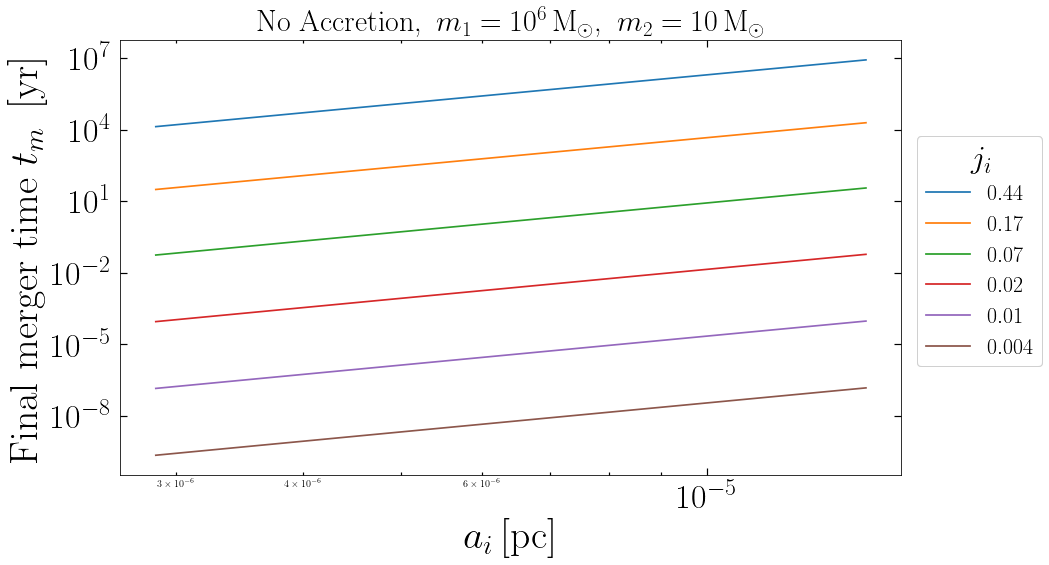

In [13]:
# The initial value of a_i or a_i_ref is calculated for a reference
# binary with PBHs of masses m_1 = 1e6 solar mass and m_2 = 10 solar mass 
# (chosen by choice).
bin_centres = np.geomspace(10, 1e6, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(10, 1e6, 5)
m_2 = np.geomspace(10, 1e6, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()  


#Setting up the binary system with initial and final conditions of the binary evolution for an eccentric orbit
m1 =  m1_arr[-1] * solar_mass_to_pc  
m2 =  m2_arr[0] * solar_mass_to_pc  
a0  = ((6 * G * m1_arr[-1])/(c**2))      #a_i = (r_isco of m1 solar mass) in units of parsec
print("a0 = ", '%0.4e'%a0, "pc")
a0_arr = np.linspace(100*a0 , 500*a0 , 10)
e0_arr = 1 - np.geomspace(0.1, 1e-5, 6) 

def j0(e0):
    return np.sqrt(1 - (e0**2))
j0_arr = np.zeros(len(e0_arr))
for i, e0 in enumerate(e0_arr):
    j0_arr[i] = j0(e0)


    
fig,ax = plt.subplots(1, figsize = (14, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
for k, (e0, color) in enumerate(zip(e0_arr, colors)):
    tm_arr_0 = np.zeros(len(a0_arr))
    for i, a0 in enumerate (a0_arr):
        D = 0
        accuracy = 1e-10
        e0 = e0_arr[k]
        a0 = a0_arr[i]
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
                gwEmissionLoss = True, dynamicalFrictionLoss = False)
        R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=R_fin_0, opt=opt_0)   
        tm_arr_0[i]    =  ev_0.t[-1]/year_to_pc
        
    ax.loglog(a0_arr, tm_arr_0, color = color,   linestyle = '-')
    slope_0, intercept_0 = np.polyfit(np.log(a0_arr), np.log(tm_arr_0), 1)
    print('\v')
    print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)
    


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
# In total 6x10 lines have been plotted
lines = ax.get_lines()
legend = plt.legend([lines[i] for i in [0,1,2,3,4,5]], ['$0.44$', '$0.17$', 
          r'$0.07$', r'$0.02$', r'$0.01$', r'$0.004$'], title = '$j_{i}$',
           title_fontsize = 32, loc = (1.02, 0.25), prop = {"size":22})

ax.add_artist(legend)


plt.xlabel('$a_{i} \, \mathrm{[pc]}$', fontsize = 40)
plt.ylabel('Final merger time $t_{m}\,$ [yr]', fontsize = 40)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No Accretion, $\, m_{1} = 10^{6} \, \mathrm{M_{\odot}}$,\: $m_{2}= 10\,  \mathrm{M_{\odot}}$ ', fontsize = 30, pad = 9)
plt.savefig('tm_vs_ai_gw2.pdf', bbox_inches='tight')
plt.show()

a0 =  2.8659e-08 pc
Evolving from  99.50953457116032  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1787s
Evolving from  143.7359943805649  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1631s
Evolving from  187.9624541899695  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1694s
Evolving from  232.18891399937408  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, }, accuracy = 1.0e-10
A termination event occurred.
 -> Evolution took 0.1751s
Evolving from  276.41537380877867  to  1.0 r_isco  with initial eccentricity 0.9  with  Options: dissipative Forces emplyed {GWLoss, },

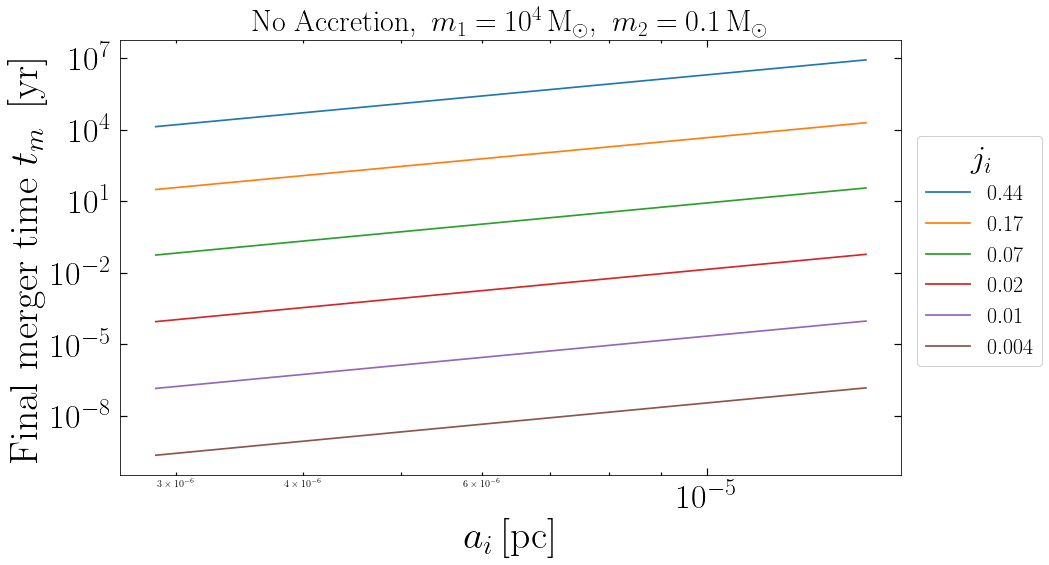

In [14]:
# The initial value of a_i or a_i_ref is calculated for a reference
# binary with PBHs of masses m_1 = 1e6 solar mass and m_2 = 10 solar mass 
# (chosen by choice).
bin_centres = np.geomspace(0.1, 1e4, 5)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(0.1, 1e4, 5)
m_2 = np.geomspace(0.1, 1e4, 5)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist()  


#Setting up the binary system with initial and final conditions of the binary evolution for an eccentric orbit
m1 =  m1_arr[-1] * solar_mass_to_pc  
m2 =  m2_arr[0] * solar_mass_to_pc  
a0  = ((6 * G * m1_arr[-1])/(c**2))      #a_i = (r_isco of m1 solar mass) in units of parsec
print("a0 = ", '%0.4e'%a0, "pc")
a0_arr = np.linspace(100*a0 , 500*a0 , 10)
e0_arr = 1 - np.geomspace(0.1, 1e-5, 6) 

def j0(e0):
    return np.sqrt(1 - (e0**2))
j0_arr = np.zeros(len(e0_arr))
for i, e0 in enumerate(e0_arr):
    j0_arr[i] = j0(e0)


    
fig,ax = plt.subplots(1, figsize = (14, 8))
plt.rc('lines', linewidth = 1.7)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 3, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 7, direction = 'in')


colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C5']
for k, (e0, color) in enumerate(zip(e0_arr, colors)):
    tm_arr_0 = np.zeros(len(a0_arr))
    tm_arr_DF = np.zeros(len(a0_arr))
    tm_arr_gwDF = np.zeros(len(a0_arr))
    for i, a0 in enumerate (a0_arr):
        D = 0
        accuracy = 1e-10
        e0 = e0_arr[k]
        a0 = a0_arr[i]
        sp_0 = ms.SystemProp(m1, m2, halo.ConstHalo(0.), D)
        opt_0 = inspiral.Classic.EvolutionOptions(accuracy=accuracy, verbose=1, 
                gwEmissionLoss = True, dynamicalFrictionLoss = False)
        R_fin_0 = sp_0.r_isco()      # The final condition for the evolution, Choosen equal to r_icso
        ev_0 = inspiral.Classic.Evolve(sp_0, a0, e0, a_fin=R_fin_0, opt=opt_0)   
        tm_arr_0[i]    =  ev_0.t[-1]/year_to_pc
        
    ax.loglog(a0_arr, tm_arr_0, color = color,   linestyle = '-')
    slope_0, intercept_0 = np.polyfit(np.log(a0_arr), np.log(tm_arr_0), 1)
    print('\v')
    print("No Accretion (GW),", "intercept = ", '%0.4f'%intercept_0, "," , "m =", '%0.4f'%slope_0)
    


ax.tick_params(axis='x', pad = 8.9)
ax.tick_params(axis='y', pad = 8.9)
# In total 6x10 lines have been plotted
lines = ax.get_lines()
legend = plt.legend([lines[i] for i in [0,1,2,3,4,5]], ['$0.44$', '$0.17$', 
          r'$0.07$', r'$0.02$', r'$0.01$', r'$0.004$'], title = '$j_{i}$',
           title_fontsize = 32, loc = (1.02, 0.25), prop = {"size":22})

ax.add_artist(legend)


plt.xlabel('$a_{i} \, \mathrm{[pc]}$', fontsize = 40)
plt.ylabel('Final merger time $t_{m}\,$ [yr]', fontsize = 40)
plt.xticks(fontsize = 34)
plt.yticks(fontsize = 34)
plt.title(r'No Accretion, $\, m_{1} = 10^{4} \, \mathrm{M_{\odot}}$,\: $m_{2}= 0.1\,  \mathrm{M_{\odot}}$ ', fontsize = 30, pad = 9)
plt.savefig('tm_vs_ai_gw3.pdf', bbox_inches='tight')
plt.show()